### 의사결정나무(DT)
- if-else 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피 (불순정도) => 낮아지는 방향 
    * 정보이득 : 1-엔트로피 => 높아지는 방향
    * 지니계수 : 불평등 수치값(높을수록 불평등) => 낮아지는 방향
- 단점 : 과대적합이 될 가능성이 높다. 성능이 좋지 않음
- 장점 : 전처리 영향을 받지 않음 / 직관성이 높음 / 피쳐들 중 주요 피쳐 확인 가능
- 주의
    * 여기서의 주요 피쳐는 데이터 분할을 위한 주요피쳐
    * 100% 데이터의 주요 피쳐가 아닐 수도 있음 => 다른 검사(상관계수, 시각화 등등)와 함께 평가

[1] 모듈 로딩 및 데이터 준비 <hr>

In [82]:
import pandas as pd


In [83]:
irisDF=pd.read_csv('../data/iris.csv')

[2] 학습용 데이터 셋 준비 
<hr>
[2-1] 피쳐와 타겟 분리

In [84]:
feature=irisDF[irisDF.columns[:4]]
target=irisDF[irisDF.columns[4]]
feature

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


[2-2] 훈련용과 테스트용 데이터셋 분리

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target)

[3] 기계학습 진행 <hr>
- 타겟 데이터 확인 결과 : 3개의 분류
- 학습 유형 : 지도학습 + 분류
    * 분류 알고리즘 => KNN, LogisticRegression, SVM-SVC, DecisionTree

[3-1] 의사결정 알고리즘으로 분류

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
# 인스턴스 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
# 생성된 모델 구조 시각화

from sklearn.tree import export_graphviz
print(export_graphviz(model,'iris_dt_model.txt'))


None


In [90]:
# DT 모델의 시각화 정보를 dot언어로 작성해서 파일로 저장
print(export_graphviz(model,'iris_dt_model.dot', feature_names=irisDF.columns[:-1], filled=True, rounded=True, class_names=irisDF.species.unique()))

None


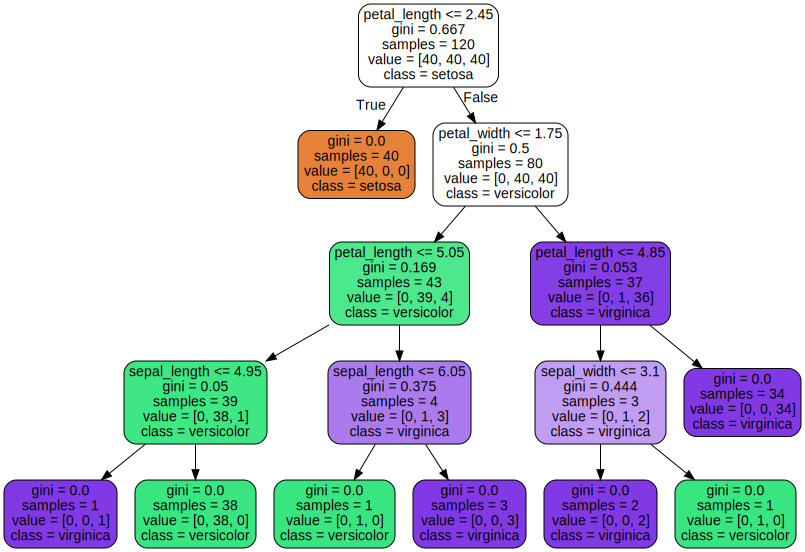

In [91]:
# dot 언어로 작성된 내용을 시각화 해주는 모듈 graphviz
import graphviz as gz
from graphviz import Source
Source.from_file('iris_dt_model.dot')

[4] 모델 평가 <hr>

In [92]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 1.0, Test score: 0.9333333333333333


[5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>
- 원인 예상
    * 데이터 셋 부족 => cv
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [93]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
# 모델 조합 조건
# cv => 기본 5, ...
# DT(결정나무)의 하이퍼파라미터 => gini, max_depth, ...

dt_model = DecisionTreeClassifier()
n_cv = 5
params = {'criterion':['gini', 'entropy', 'log_loss'], 
          'max_depth':[5, 10, 15],
          'min_samples_split':[2,4,6]
          }
# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습
# 진행해주는 인스턴스
gs = GridSearchCV(dt_model, param_grid=params, cv=n_cv)

In [95]:
# 조합된 모델들의 학습 진행
result=gs.fit(X_train, y_train)

In [96]:
# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [97]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과 => 조합된 모델의 갯수만큼 나온다
cv_resultsDF=pd.DataFrame(gs.cv_results_)
cv_resultsDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001202,0.000406,0.001000,9.556273e-06,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,1.000000,0.916667,0.916667,0.958333,0.950000,0.031180,2
1,0.001996,0.000005,0.001803,4.008056e-04,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.958333,0.916667,0.916667,0.958333,0.941667,0.020412,4
2,0.001198,0.000402,0.001001,5.560829e-07,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.958333,0.916667,0.916667,0.958333,0.941667,0.020412,4
3,0.001001,0.000002,0.000833,4.213109e-04,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,1.000000,0.958333,0.916667,0.958333,0.958333,0.026352,1
4,0.001783,0.000394,0.001417,5.089960e-04,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.958333,0.916667,0.916667,0.958333,0.941667,0.020412,4
5,0.001385,0.000473,0.001214,3.937855e-04,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.958333,0.916667,0.916667,0.958333,0.941667,0.020412,4
6,0.001796,0.000398,0.000805,4.027706e-04,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,1.000000,0.875000,0.916667,0.916667,0.933333,0.042492,21
7,0.001001,0.000001,0.001015,3.150461e-05,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.958333,0.875000,0.916667,0.958333,0.933333,0.033333,21
8,0.001604,0.000510,0.000592,4.835257e-04,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.958333,0.916667,0.916667,0.958333,0.941667,0.020412,4
9,0.001402,0.000488,0.001000,7.404653e-06,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958333,1.000000,0.875000,0.916667,0.958333,0.941667,0.042492,4


In [98]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [99]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
my_best_model = gs.best_estimator_

In [100]:
# 조합된 모델 중 최고의 점수   (test score기준)
gs.best_score_

0.9583333333333334

[6] 학습 및 튜닝 후 모델 저장 <hr>
- 다른 파일에서 활용이 가능한 파일 형태로 저장
- 웹, 앱 원는 곳에서 활용 가능
- scikit-lean 에서는 pickle 포맥으로 저장
- joblib 모듈에 해당 기능 포함되어 있음

In [103]:
import joblib
import os

In [106]:
# 모델 저장
model_dir = '../model/'
model_filename = model_dir+'iris_dt.pkl'

# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
joblib.dump(my_best_model, model_filename)

['../model/iris_dt.pkl']